In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Importing tensorflow datasets to access the fashion mnist dataset!
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
#See all the datasets - and identify the one we want - 'fashion_mnist'
tfds.list_builders()

2024-04-04 21:34:07.885669: W tensorflow/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'asu_table_top_converted_externally_to_rlds',
 'austin_buds_dataset_converted_externally_to_rlds',
 'austin_sailor_dataset_converted_externally_to_rlds',
 'austin_sirius_dataset_converted_externally_to_rlds',
 'bair_robot_pushing_small',
 'bc_z',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'berkeley_autolab_ur5',
 'berkeley_cable_routing',
 'berkeley_fanuc_manipulation',
 'berkeley_gnm_cory_hall',
 'berkeley_gnm_recon',
 'berkeley_gnm_sac_son',
 'berkeley_mvp_converted_externally_to_rlds',
 'berkeley_rpt_converted_externally_to_rlds',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bot_adversarial_dialogue',
 'bridge',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_b

In [ ]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize the pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
#The labels are stored as numeric values. Creating a dictionary to map the label numeric value to the category word
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [ ]:
# checking how many occurences of each label category in train dataset
label_counts = np.bincount(train_labels)

# Print the label counts
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} occurrences of "+ labels[label])

Label 0: 6000 occurrences of T-shirt/top
Label 1: 6000 occurrences of Trouser
Label 2: 6000 occurrences of Pullover
Label 3: 6000 occurrences of Dress
Label 4: 6000 occurrences of Coat
Label 5: 6000 occurrences of Sandal
Label 6: 6000 occurrences of Shirt
Label 7: 6000 occurrences of Sneaker
Label 8: 6000 occurrences of Bag
Label 9: 6000 occurrences of Ankle Boot


In [ ]:
# checking how many occurences of each label category in test dataset
label_counts = np.bincount(test_labels)

# Print the label counts
for label, count in enumerate(label_counts):
    print(f"Label {label}: {count} occurrences of "+ labels[label])


Label 0: 1000 occurrences of T-shirt/top
Label 1: 1000 occurrences of Trouser
Label 2: 1000 occurrences of Pullover
Label 3: 1000 occurrences of Dress
Label 4: 1000 occurrences of Coat
Label 5: 1000 occurrences of Sandal
Label 6: 1000 occurrences of Shirt
Label 7: 1000 occurrences of Sneaker
Label 8: 1000 occurrences of Bag
Label 9: 1000 occurrences of Ankle Boot


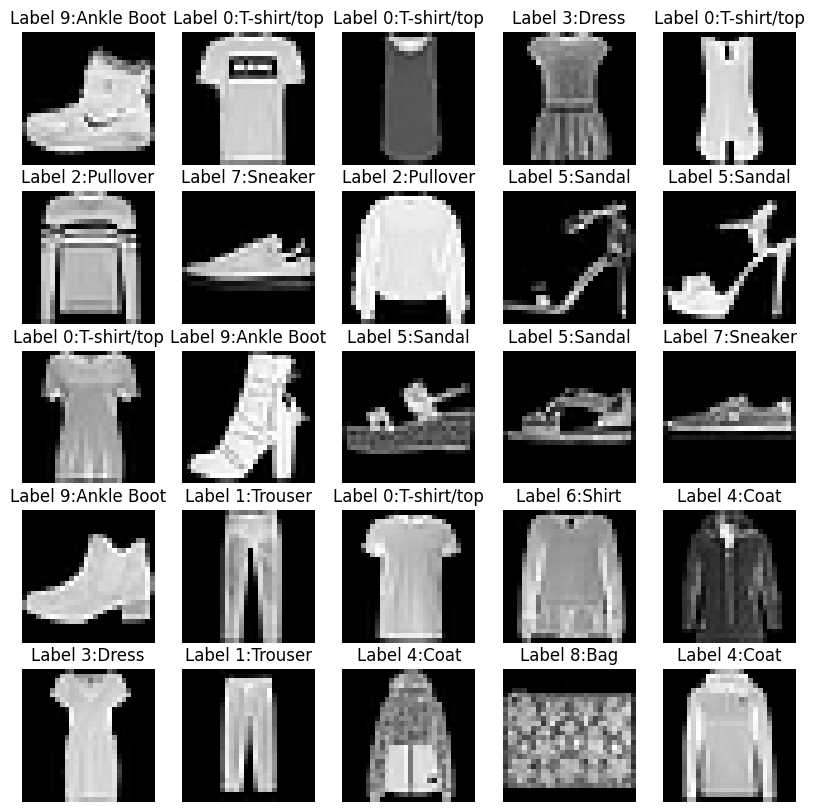

In [ ]:
# Display some sample images from train dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f'Label {train_labels[i]}'+":"+labels[train_labels[i]])
    plt.axis('off')
plt.show()

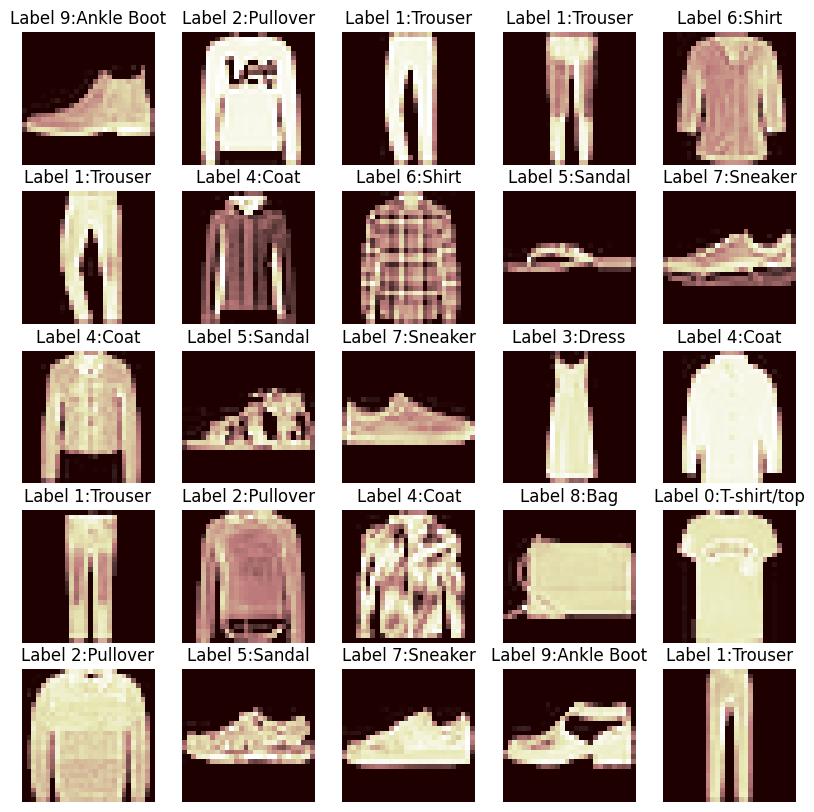

In [ ]:
# Display some sample images from test dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='pink')
    plt.title(f'Label {test_labels[i]}'+":"+labels[test_labels[i]])
    plt.axis('off')
plt.show()

In [ ]:
#Reshaping the data from pixels: Each image is composed of 28*28 pixels(784 columns) - we are reshaping it so that is suitable for CNN input
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#Reshaping
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)

In [ ]:
# Define the CNN model: First model which has 3 Convolution+ReLU layers for feature extraction and
model1 = Sequential([
    Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),#32 filters with a kernel size of 3x3, using the ReLU activation function. Input shape of (28, 28, 1) indicates grayscale images of size 28x28 pixels.
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),#64 filters with a kernel size of 3x3, using the ReLU activation function. Extracts more complex features from the images.
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),#128 filters with a kernel size of 3x3, using the ReLU activation function. Further extracts higher-level features from the images.
    Flatten(),
    Dense(128, activation='relu'),#Fully connected layer with 128 neurons and ReLU activation function.
    Dropout(0.5),#to avoid overfitting - an avg of 50% of neurons will be set to zero during training out of the 128 neurons
    Dense(10, activation='softmax')#output layer with 10 neurons because there's 10 categories for output labels
])

In [ ]:
# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#this dataset has ample amount of data - 60000 - so we dont have to use data augmentation
#Visualizing and summarizing the model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten (Flatten)           (None, 1152)              0

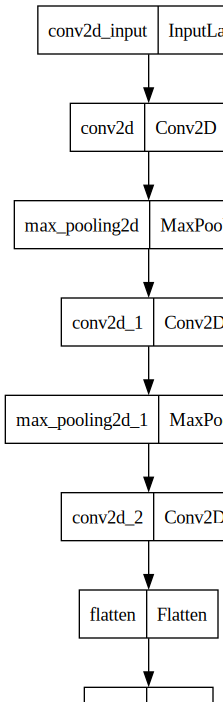

In [ ]:
from tensorflow.keras.utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG
plot_model(model1, to_file='model1.png')
SVG(model_to_dot(model1).create(prog='dot', format='svg'))

In [ ]:
import os

# Specify the full path to the Graphviz bin directory
os.environ["PATH"] += os.pathsep + '/opt/homebrew/bin'

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=2024)
#choosing 20% data for validation and random_state value to be 2024

In [ ]:
# Fit the model - Choosing 128 as batch size as we have large amount of data and epochs as 40
history = model1.fit(X_train, y_train, batch_size=128,
                    steps_per_epoch=len(X_train) / 128, epochs=40,
                    validation_data=(X_val, y_val))

Epoch 1/40


2024-04-04 21:42:35.859903: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 8s 21ms/step - loss: 0.7208 - accuracy: 0.7354 - val_loss: 0.4377 - val_accuracy: 0.8370
Epoch 2/40
375/375 [==============================] - 8s 21ms/step - loss: 0.4523 - accuracy: 0.8388 - val_loss: 0.3643 - val_accuracy: 0.8643
Epoch 3/40
375/375 [==============================] - 8s 21ms/step - loss: 0.3808 - accuracy: 0.8650 - val_loss: 0.3257 - val_accuracy: 0.8793
Epoch 4/40
375/375 [==============================] - 8s 21ms/step - loss: 0.3399 - accuracy: 0.8780 - val_loss: 0.3046 - val_accuracy: 0.8848
Epoch 5/40
375/375 [==============================] - 8s 21ms/step - loss: 0.3088 - accuracy: 0.8875 - val_loss: 0.2769 - val_accuracy: 0.8972
Epoch 6/40
375/375 [==============================] - 8s 21ms/step - loss: 0.2887 - accuracy: 0.8964 - val_loss: 0.2858 - val_accuracy: 0.8940
Epoch 7/40
375/375 [==============================] - 8s 21ms/step - loss: 0.2675 - accuracy: 0.9028 - val_loss: 0.2609 - val_accuracy: 0.9034
Epoch 8/40

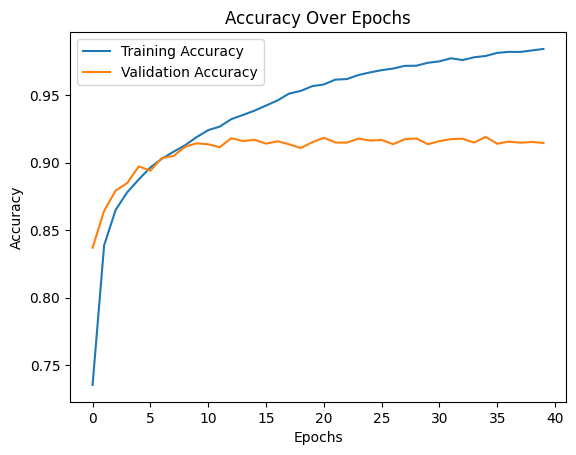

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [ ]:
score = model1.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5148318409919739
Test accuracy: 0.9110999703407288


In [ ]:
# Defining new the CNN model(model2): First model which has 3 Convolution+ReLU layers for feature extraction and two dense layers used for classification
#Increasing the number of droupout layers by adding one after each pooling layer in the feature extraction phase of CNN model
model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),#32 filters with a kernel size of 3x3, using the ReLU activation function. Input shape of (28, 28, 1) indicates grayscale images of size 28x28 pixels.
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),#to avoid overfitting - an avg of 20% of neurons will be set to zero during training out of the 32 neurons
    Conv2D(64, kernel_size=(3, 3), activation='relu'),#64 filters with a kernel size of 3x3, using the ReLU activation function. Extracts more complex features from the images.
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),#to avoid overfitting - an avg of 30% of neurons will be set to zero during training out of the 64 neurons
    Conv2D(128, kernel_size=(3, 3), activation='relu'),#128 filters with a kernel size of 3x3, using the ReLU activation function. Further extracts higher-level features from the images.
    Dropout(0.40),#to avoid overfitting - an avg of 40% of neurons will be set to zero during training out of the 128 neurons
    Flatten(),
    Dense(128, activation='relu'),#Fully connected layer with 128 neurons and ReLU activation function.
    Dropout(0.25),#to avoid overfitting - an avg of 25% of neurons will be set to zero during training out of the 128 neurons
    Dense(10, activation='softmax')#output layer with 10 neurons because there's 10 categories for output labels
])

In [ ]:
# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#this dataset has ample amount of data - 60000 - so we dont have to use data augmentation
#Visualizing and summarizing the model
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)         

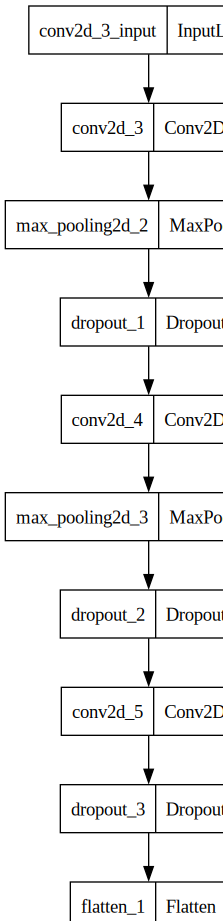

In [ ]:
plot_model(model2, to_file='model2.png')
SVG(model_to_dot(model2).create(prog='dot', format='svg'))

In [ ]:
# Fit the model - Choosing 128 as batch size as we have large amount of data and epochs as 40
history2 = model2.fit(X_train, y_train, batch_size=128,
                    steps_per_epoch=len(X_train) / 128, epochs=40,
                    validation_data=(X_val, y_val))

Epoch 1/40
375/375 [==============================] - 9s 24ms/step - loss: 0.7700 - accuracy: 0.7082 - val_loss: 0.4928 - val_accuracy: 0.8238
Epoch 2/40
375/375 [==============================] - 9s 25ms/step - loss: 0.4926 - accuracy: 0.8159 - val_loss: 0.3798 - val_accuracy: 0.8594
Epoch 3/40
375/375 [==============================] - 9s 24ms/step - loss: 0.4185 - accuracy: 0.8449 - val_loss: 0.3412 - val_accuracy: 0.8761
Epoch 4/40
375/375 [==============================] - 9s 25ms/step - loss: 0.3768 - accuracy: 0.8625 - val_loss: 0.3212 - val_accuracy: 0.8790
Epoch 5/40
375/375 [==============================] - 9s 24ms/step - loss: 0.3536 - accuracy: 0.8699 - val_loss: 0.2898 - val_accuracy: 0.8928
Epoch 6/40
375/375 [==============================] - 9s 24ms/step - loss: 0.3314 - accuracy: 0.8791 - val_loss: 0.2797 - val_accuracy: 0.8988
Epoch 7/40
375/375 [==============================] - 9s 25ms/step - loss: 0.3156 - accuracy: 0.8850 - val_loss: 0.2715 - val_accuracy: 0.8993

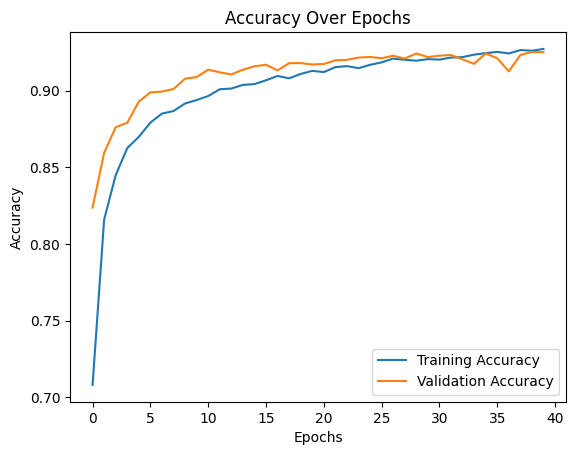

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [ ]:
score = model2.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.225363090634346
Test accuracy: 0.9215999841690063


In [ ]:
# retrain the model based on model 2, adjust the number of filters in each conv2d layer, the kernel size of the first conv2d layer,
# the dropout rate and the neuron count in the dense layer
model3 = Sequential([
    Conv2D(64, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.35),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    Dropout(0.45),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#this dataset has ample amount of data - 60000 - so we dont have to use data augmentation
#Visualizing and summarizing the model
model3.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_53 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 dropout_54 (Dropout)        (None, 5, 5, 128)       

In [ ]:
# early stopping to tackle over-fitting problem
from keras.callbacks import EarlyStopping

#add early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# Fit the model - Choosing 128 as batch size as we have large amount of data and epochs as 40
history3 = model3.fit(X_train, y_train, batch_size=128,
                    steps_per_epoch=len(X_train) / 128, epochs=40,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/40
375/375 [==============================] - 21s 57ms/step - loss: 0.6487 - accuracy: 0.7572 - val_loss: 0.3973 - val_accuracy: 0.8549
Epoch 2/40
375/375 [==============================] - 20s 53ms/step - loss: 0.4069 - accuracy: 0.8507 - val_loss: 0.3362 - val_accuracy: 0.8727
Epoch 3/40
375/375 [==============================] - 20s 55ms/step - loss: 0.3519 - accuracy: 0.8685 - val_loss: 0.3051 - val_accuracy: 0.8887
Epoch 4/40
375/375 [==============================] - 17s 46ms/step - loss: 0.3205 - accuracy: 0.8800 - val_loss: 0.2779 - val_accuracy: 0.8974
Epoch 5/40
375/375 [==============================] - 17s 46ms/step - loss: 0.3001 - accuracy: 0.8888 - val_loss: 0.2718 - val_accuracy: 0.9020
Epoch 6/40
375/375 [==============================] - 20s 54ms/step - loss: 0.2844 - accuracy: 0.8930 - val_loss: 0.2514 - val_accuracy: 0.9057
Epoch 7/40
375/375 [==============================] - 18s 47ms/step - loss: 0.2733 - accuracy: 0.8978 - val_loss: 0.2429 - val_accuracy:

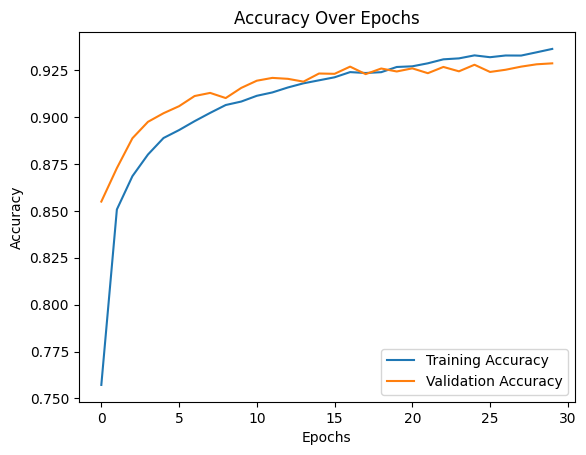

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Over Epochs')
plt.show()

In [ ]:
score = model3.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22104831039905548
Test accuracy: 0.9222999811172485


In [ ]:
# Show some test data and predicted classes for model1
print("PREDICTION BY MODEL1:")
predicted_probs = model1.predict(test_images[:20])
predicted_classes = np.argmax(predicted_probs, axis=1)
print("Predicted Classes for Test Data:")
print(predicted_classes)
print("Actual Classes for Test Data:")
print(test_labels[:20])


# Show some test data and predicted classes for model2
print("PREDICTION BY MODEL2:")
predicted_probs = model2.predict(test_images[:20])
predicted_classes = np.argmax(predicted_probs, axis=1)
print("Predicted Classes for Test Data:")
print(predicted_classes)
print("Actual Classes for Test Data:")
print(test_labels[:20])

# Show some test data and predicted classes for model3
print("PREDICTION BY MODEL3:")
predicted_probs = model3.predict(test_images[:20])
predicted_classes = np.argmax(predicted_probs, axis=1)
print("Predicted Classes for Test Data:")
print(predicted_classes)
print("Actual Classes for Test Data:")
print(test_labels[:20])

PREDICTION BY MODEL1:
The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
1/1 [==============================] - 0s 380ms/step
Predicted Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
Actual Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
PREDICTION BY MODEL2:
1/1 [==============================] - 0s 39ms/step
Predicted Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
Actual Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
PREDICTION BY MODEL3:
1/1 [==============================] - 0s 44ms/step
Predicted Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
Actual Classes for Test Data:
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]
